In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# # x = np.sin(2*np.pi*nu*t)

def sinc_win(P,N):
    M=N*P
    x = np.pi*(np.arange(0,M)-M/2)/N
    return np.sinc(x)

def get_pow(N, win):
    delta = np.linspace(-4,4,10001)
    pos = np.zeros(10001)
    nu=10+delta
    t = np.linspace(0,1,N)
    for i,n in enumerate(nu):
        x = win(N)*np.exp(2j*np.pi*n*t)
        X = np.fft.fft(x)
        pos[i]=np.abs(X)[10]**2
    return pos

def pfb(x,N,ntap):
    M=N*ntap
    s = sinc_win(ntap,N)
    h = np.hanning(M)
    #print(ntap)
    y = s*h*x
    y = y.reshape(-1,N,order='c')
    y = np.sum(y, axis=0)
    X = np.fft.fft(y)
#     X = np.fft.fft(s*h*x)
#     print(X)
#     X = X[::ntap].copy()

    return X

def get_pow_pfb(N, ntap, chan):
    delta = np.linspace(-4,4,10001)
    pos = np.zeros(10001)
    nu=chan+delta
    M = N*ntap
    t = np.linspace(0,1,M)
    
    for i,n in enumerate(nu):
#         if(i>2):
#             break
#         print(x.shape)
        x = np.exp(2j*np.pi*n*t)
        X = pfb(x,N,ntap)
#         print(X.shape)
        pos[i]=np.abs(X)[16]**2
    return pos

(-10.0, 10.0)

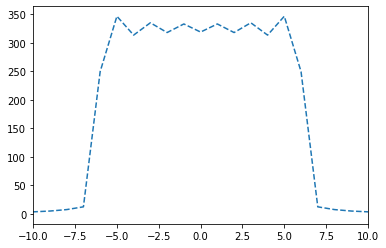

In [23]:
ss = sinc_win(4,1024)
fs = np.fft.fft(ss)
plt.plot(np.fft.fftshift(4096*np.fft.fftfreq(4096)),np.fft.fftshift(np.abs(fs)), '--')
plt.xlim(-10,10)

In [21]:
np.fft.fftshift(4096*np.fft.fftfreq(4096))

array([-2048., -2047., -2046., ...,  2045.,  2046.,  2047.])

In [17]:
han = lambda N: np.hanning(N)
flat = lambda N: np.ones(N)
pos = get_pow(1024,flat)
pos2 = get_pow(1024,han)

In [172]:
pos3 = get_pow_pfb(1024,8,128)

In [163]:
n=4096
nu=131.99
t = np.linspace(0,1,n)
# x = np.exp(2j*np.pi*nu*t)
x = np.sin(2*np.pi*nu*t)
Xf = pfb(x,1024,4)
# t = np.linspace(0,1,1024)
# x = np.sin(2*np.pi*nu*t)
Xfnormal = np.fft.rfft(x)

(25.0, 35.0)

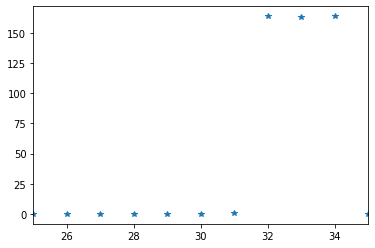

In [164]:
plt.plot(np.abs(Xf),'*')
plt.xlim(25,35)

(120.0, 135.0)

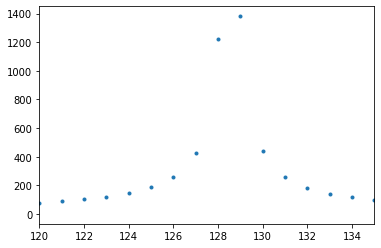

In [119]:
plt.plot(np.abs(Xfnormal),'.')
plt.xlim(120,135)

(5.0, 15.0)

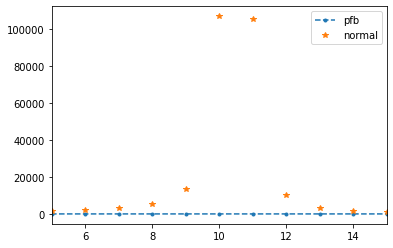

In [93]:
plt.plot(np.abs(Xf)**2,'--.',label='pfb')
plt.plot(np.abs(Xfnormal)**2,'*',label='normal')
plt.legend()
plt.xlim(5,15)